<a href="https://colab.research.google.com/github/diogosantanaime/redes_neurais/blob/main/mlp_keras_reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 -Importação das bibliotecas.

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer


2 - Leitura do conjunto de dados de treino e teste da Reuters (limitado a 10.000 palavras).

In [36]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)


3 - Verificando o formato dos conjunto de dados de treino e teste.

In [37]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((8982,), (8982,), (2246,), (2246,))

4 - Como o conjunto de dados da Reuters variam de 0 a 45, temos 46 classes no total.

In [38]:
num_classes = max(y_train) + 1

5 - Cria o objeto 'tokenizer' para converter as sequências de índices de palavras em sequências de vetores binários. 

In [39]:
tokenizer = Tokenizer(num_words=num_words)

x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

6 - Converte os rótulos de classes em vetores binários.

In [40]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

7 - Define o modelo de rede neural com uma camada oculta de 512 neurônios com uma função de ativação Relu, uma camada de Dropout com taxa de 0.5 e uma camada de saída com uma função de ativação Softmax. 

In [41]:
model = Sequential()
model.add(Dense(512, input_shape=(num_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


8 - Visualizando o resumo do modelo

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               5120512   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 46)                23598     
                                                                 
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


8 - Compilando o modelo criado para especificar a função de perda e otimizador a ser usado.

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


9 - Treinamento do modelo.

In [44]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)


Epoch 1/5
253/253 [==============================] - 22s 83ms/step - loss: 1.2810 - accuracy: 0.7204 - val_loss: 0.9760 - val_accuracy: 0.7820
Epoch 2/5
253/253 [==============================] - 21s 84ms/step - loss: 0.4889 - accuracy: 0.8894 - val_loss: 0.8389 - val_accuracy: 0.8131
Epoch 3/5
253/253 [==============================] - 21s 82ms/step - loss: 0.2780 - accuracy: 0.9381 - val_loss: 0.9227 - val_accuracy: 0.8154
Epoch 4/5
253/253 [==============================] - 21s 83ms/step - loss: 0.2156 - accuracy: 0.9493 - val_loss: 0.9426 - val_accuracy: 0.8065
Epoch 5/5
253/253 [==============================] - 22s 86ms/step - loss: 0.2060 - accuracy: 0.9515 - val_loss: 0.9646 - val_accuracy: 0.8109


10 - Avaliando o desempenho do modelo com o conjunto de dados de teste.

In [45]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Teste de perda:', score[0])
print('Teste de acurácia:', score[1])

71/71 [==============================] - 1s 14ms/step - loss: 0.9591 - accuracy: 0.8063
Teste de perda: 0.9591064453125
Teste de acurácia: 0.8063223361968994


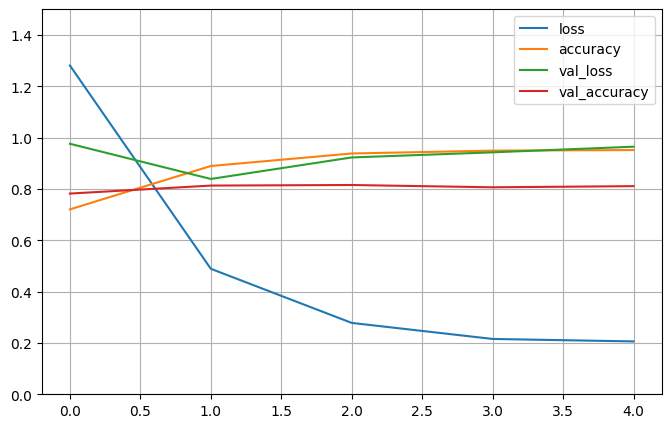

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()